In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense, SimpleRNN
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

In [2]:
# IMDbデータの前処理
max_features = 10000
max_len = 500
batch_size = 32

print('Loading data...')
(input_train, y_train), (input_test, x_train) = imdb.load_data(num_words=max_features)
print(len(input_train), 'train_sequences')
print(len(input_test), 'test sequences')

print('Pad sequneces (sampple x times)')
input_train = sequence.pad_sequences(input_train, maxlen=max_len)
input_test = sequence.pad_sequences(input_test, maxlen=max_len)
print('input_train shape: ', input_train.shape)
print('input_test shape: ', input_test.shape)

Loading data...
25000 train_sequences
25000 test sequences
Pad sequneces (sampple x times)
input_train shape:  (25000, 500)
input_test shape:  (25000, 500)


In [3]:
# Embedding層とSimpleRNN層を使ってモデルを訓練
model = Sequential()
model.add(Embedding(max_features, 32))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train,
         epochs=10,
         batch_size=128,
         validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 136s 7ms/sample - loss: 0.6556 - acc: 0.5963 - val_loss: 0.5208 - val_acc: 0.7550
Epoch 2/10
20000/20000 [==============================] - 109s 5ms/sample - loss: 0.4193 - acc: 0.8205 - val_loss: 0.4925 - val_acc: 0.7612
Epoch 3/10
20000/20000 [==============================] - 117s 6ms/sample - loss: 0.3017 - acc: 0.8775 - val_loss: 0.3745 - val_acc: 0.8504
Epoch 4/10
20000/20000 [==============================] - 116s 6ms/sample - loss: 0.2190 - acc: 0.9158 - val_loss: 0.6062 - val_acc: 0.7680
Epoch 5/10
20000/20000 [==============================] - 132s 7ms/sample - loss: 0.1506 - acc: 0.9445 - val_loss: 0.5260 - val_acc: 0.7992
Epoch 6/10
20000/20000 [==============================] - 159s 8ms/sample - loss: 0.0954 - acc: 0.9685 - val_loss: 0.5197 - val_acc: 0.8196
Epoch 7/10
20000/20000 [==============================] - 156s 8ms/sample - loss: 0.0590 - acc: 0.9822 - val_lo

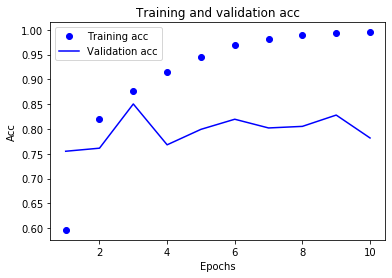

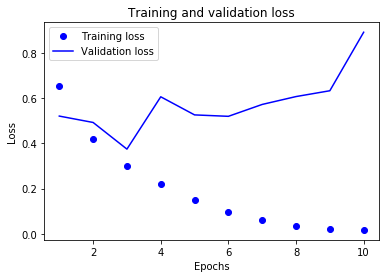

In [4]:
# 結果を表示
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training acc')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.figure()

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [5]:
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Embedding(max_features, 32))
model.add(LSTM(32))
model.add(Dense(1, activation='relu'))

model.compile(optimizer='rmsprop',
             loss='binary_crossentropy',
             metrics=['acc'])
history = model.fit(input_train, y_train,
         epochs=10,
         batch_size=128,
         validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 413s 21ms/sample - loss: 0.6400 - acc: 0.6988 - val_loss: 0.4013 - val_acc: 0.8314
Epoch 2/10
20000/20000 [==============================] - 405s 20ms/sample - loss: 0.4615 - acc: 0.8433 - val_loss: 1.4420 - val_acc: 0.7596
Epoch 3/10
20000/20000 [==============================] - 282s 14ms/sample - loss: 0.4172 - acc: 0.8612 - val_loss: 0.3942 - val_acc: 0.8508
Epoch 4/10
 3328/20000 [===>..........................] - ETA: 3:57 - loss: 0.2440 - acc: 0.9234

KeyboardInterrupt: 

In [ ]:
# 結果を表示
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training acc')
# b is for "solid blue line"
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Acc')
plt.legend()

plt.figure()

# "bo" is for "blue dot"
plt.plot(epochs, loss, 'bo', label='Training loss')
# b is for "solid blue line"
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()